In [321]:
from openseespy.opensees import *
import openseespy.opensees as ops
import numpy as np
import matplotlib.pyplot as plt
import opsvis as opsv

In [322]:
# wipe everything from existing model
ops.wipe()
# set modelbuilder => model('basic', '-ndm', ndm, '-ndf', ndf=ndm*(ndm+1)/2)
model('basic', '-ndm', 2, '-ndf', 2)

In [323]:
# create node => node(nodeTag, *crds)
node(1, 0, 0)
node(2, 3, 0)
node(3, 6, 0)
node(4, 9, 0)
node(5, 3, 3)
node(6, 6, 3)

<Axes: >

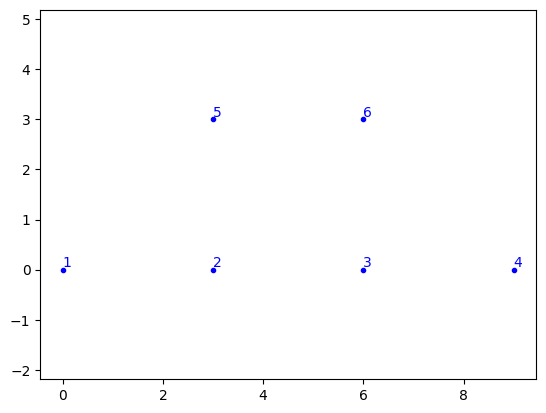

In [324]:
plot_model()

In [325]:
# boundary condition => fix(nodeTag, *constrValues)
fix(1, *[1, 1])
fix(4, *[0, 1])

In [326]:
# define materials => uniaxialMaterial('Elastic', matTag, E)
uniaxialMaterial('Elastic', 1, 200e9)

In [327]:
# make elements => element('Truss', eleTag, *eleNodes, A, matTag)
connectivity_list = [(1,2),(2, 3),(3,4),(1,5),(2,5),(2,6),(3,6),(4,6),(5,6)]
for i, each in enumerate(connectivity_list):
    element('Truss', i+1, *each, 300e-6, 1)
    print(f"Element joining {each} made.")

Element joining (1, 2) made.
Element joining (2, 3) made.
Element joining (3, 4) made.
Element joining (1, 5) made.
Element joining (2, 5) made.
Element joining (2, 6) made.
Element joining (3, 6) made.
Element joining (4, 6) made.
Element joining (5, 6) made.


<Axes: >

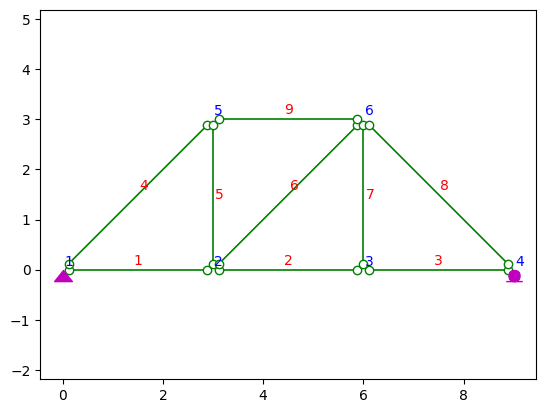

In [328]:
opsv.plot_model()

In [329]:
# create timeseries => timeSeries('Linear', tag)
timeSeries('Linear', 1)

# create pattern => pattern('Plain', patternTag, tsTag)
pattern('Plain', 1, 1)

# create load => load(nodeTag, *loadValues)
load(2, *[0, -20e3])
load(3, *[0, -20e3])

In [330]:
# ANALYSIS COMMANDS
# create SOE
system("BandSPD")
# create DOF number
numberer("RCM")
# create constraint handler
constraints("Plain")
# create integrator => integrator('LoadControl', incr)
integrator("LoadControl", 0.001)
# create algorithm
algorithm("Linear")
# create analysis object
analysis("Static")
# perform the analysis => analyze(numIncr=1) numIncr = number of steps
analyze(1000)

0

In [331]:
# Extract displacement of joint C => nodeDisp(nodeTag, dof)
u_cy = nodeDisp(3, 2)
print(f"The displacement of joint C is {u_cy*1000:.3f} mm.")

The displacement of joint C is -6.162 mm.


In [332]:
# Extract reactions
reactions()
r_ay = nodeReaction(1, 2)/1000
r_dy = nodeReaction(4, 2)/1000
print(f"The reaction in support A is {r_ay:.3f} kN.")
print(f"The reaction in support D is {r_dy:.3f} kN.")

The reaction in support A is 20.000 kN.
The reaction in support D is 20.000 kN.
